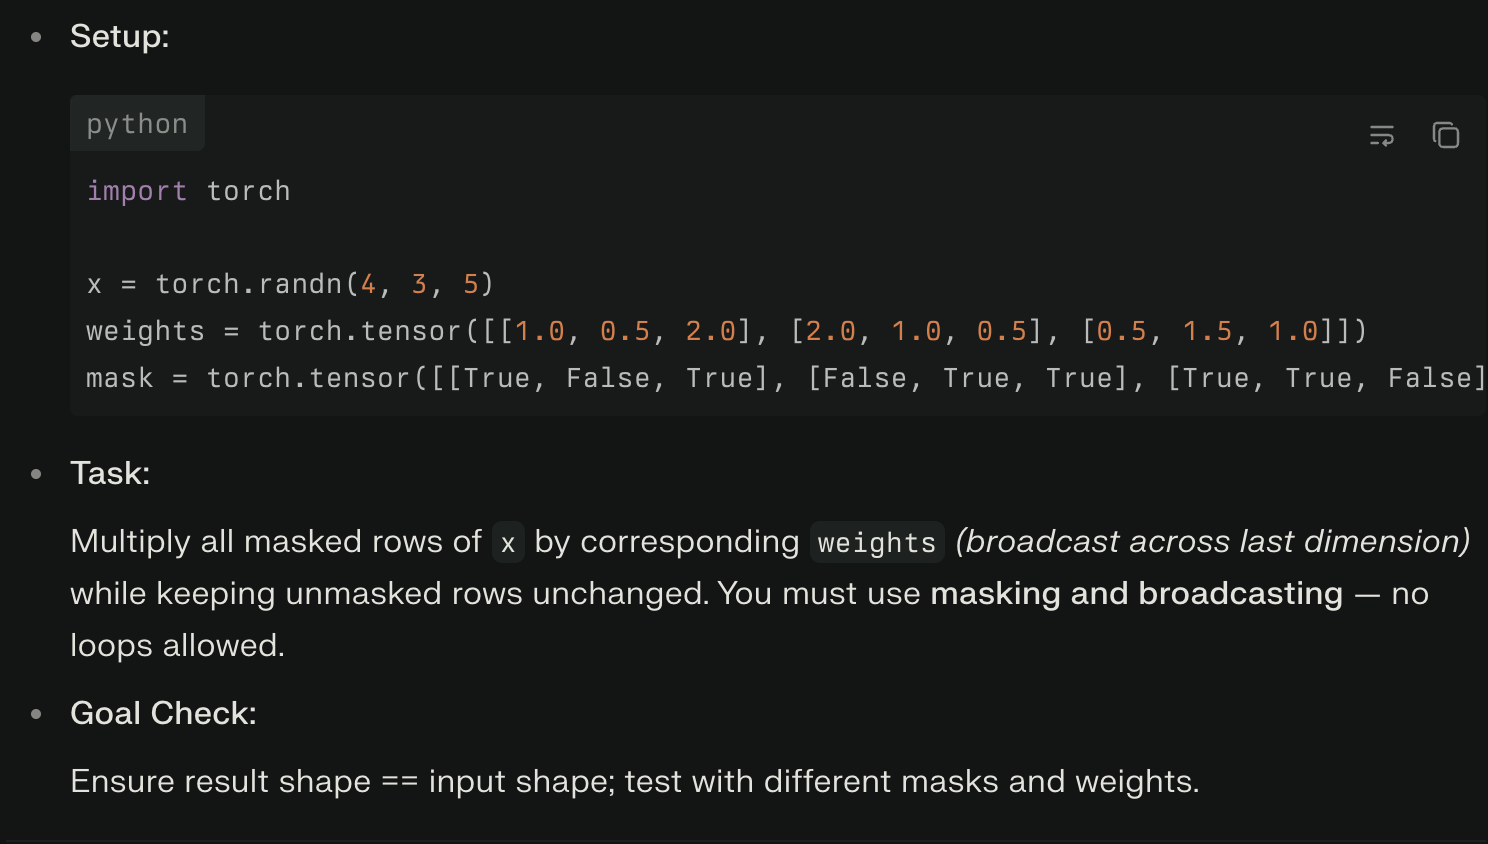

In [32]:
import torch

x = torch.randn(4, 3, 5)
weights = torch.tensor([[1.0, 0.5, 2.0], [2.0, 1.0, 0.5], [0.5, 1.5, 1.0]])
mask = torch.tensor([[True, False, True], [False, True, True], [True, True, False], [False, False, True]])


In [27]:
mask = mask.unsqueeze(dim = -1)
mask = torch.expand_copy(mask, size = x.shape)
x = x*mask


In [33]:
# weights = weights.unsqueeze(-1)
weights = torch.expand_copy(weights,x.shape[:2])

RuntimeError: The expanded size of the tensor (4) must match the existing size (3) at non-singleton dimension 0.  Target sizes: [4, 3].  Tensor sizes: [3, 3]

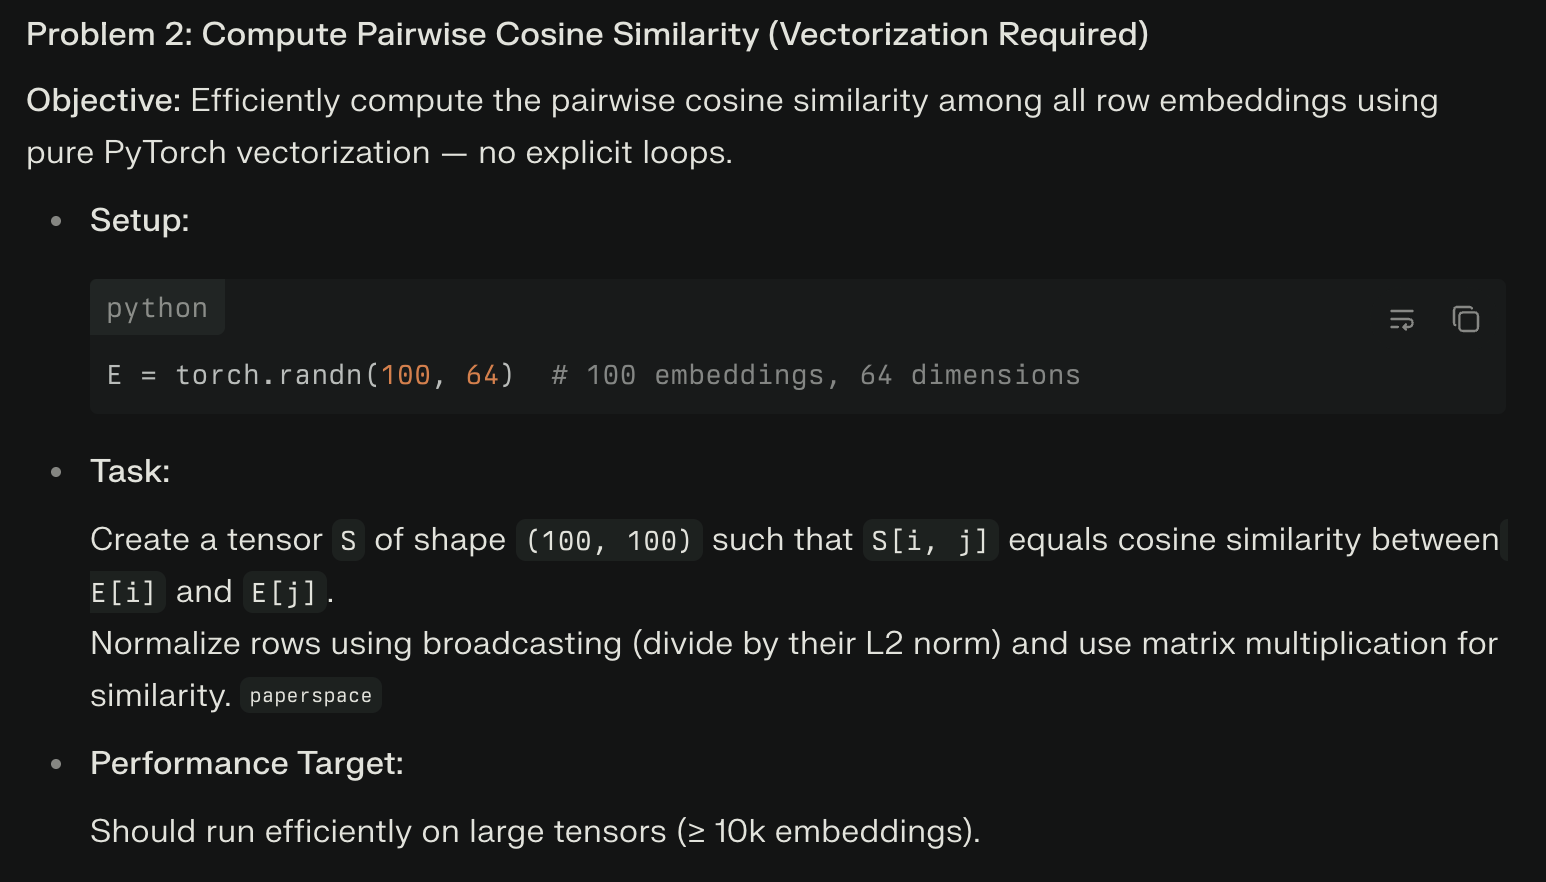

If you have a single embedding `e`, then  `e.T @ e` gives us the square of the magnitude of the embedding. <br>
If you have multple embeddings in a batch, then the `E @ E.T` gives us pair-wise cosine similarity between every pair of embeddings provided that all the embeddings are normalised


In [46]:
import torch

e = torch.randn((100,64))
e = e/e.norm(dim=1, keepdim=True)

cos_sim = e @ e.T # a @ a.T = elementwise a.a

In [47]:
cos_sim

tensor([[ 1.0000,  0.1229, -0.0409,  ..., -0.0045,  0.1524,  0.1103],
        [ 0.1229,  1.0000, -0.2954,  ...,  0.1332,  0.1865,  0.1482],
        [-0.0409, -0.2954,  1.0000,  ..., -0.0141, -0.2348, -0.1861],
        ...,
        [-0.0045,  0.1332, -0.0141,  ...,  1.0000, -0.0227, -0.0279],
        [ 0.1524,  0.1865, -0.2348,  ..., -0.0227,  1.0000,  0.0110],
        [ 0.1103,  0.1482, -0.1861,  ..., -0.0279,  0.0110,  1.0000]])

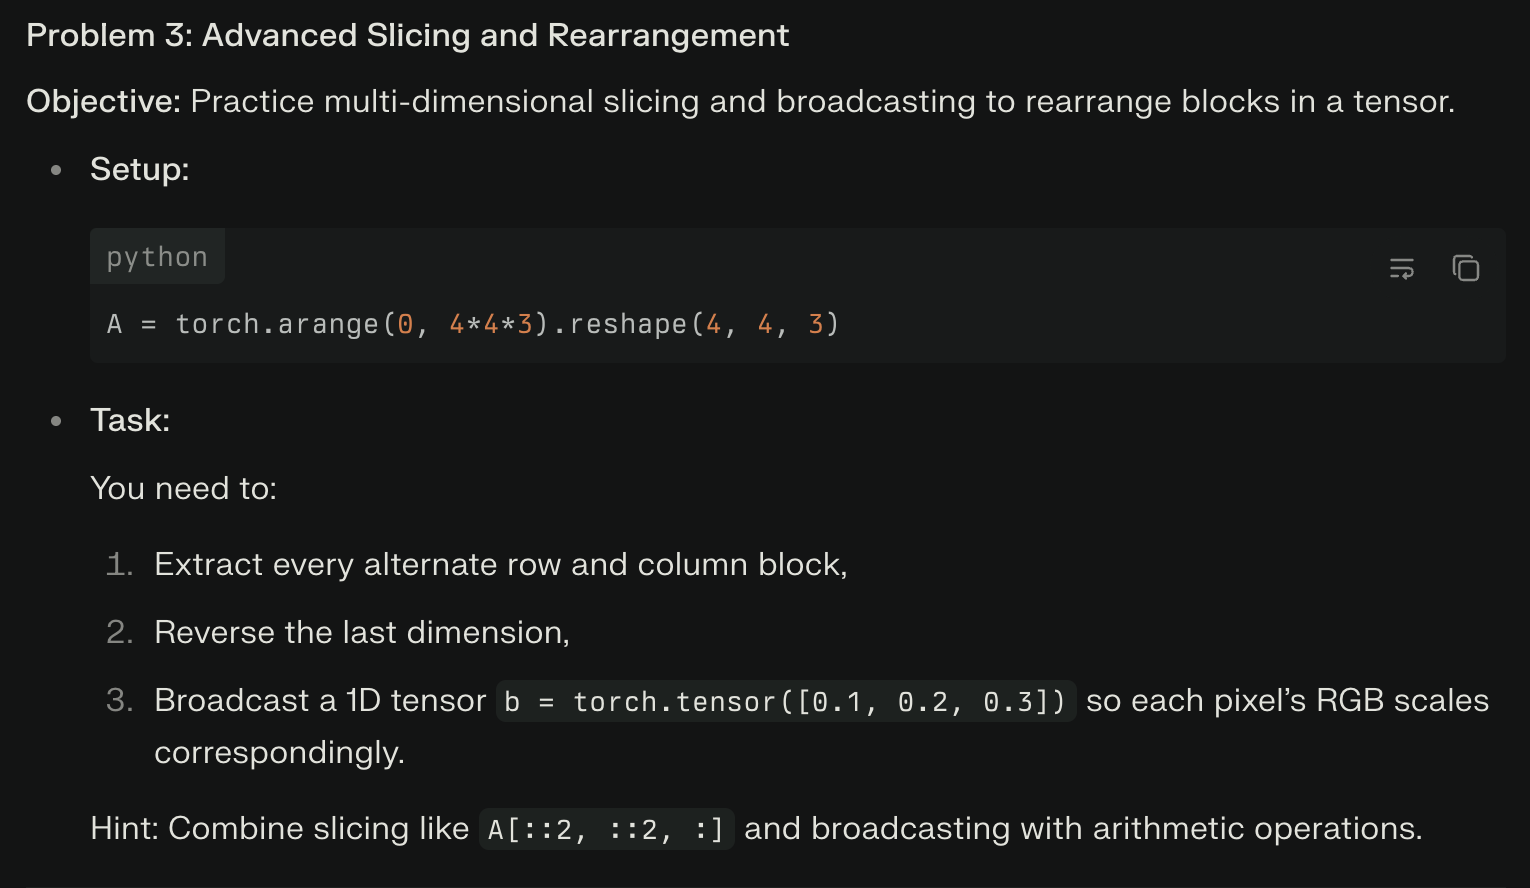

In [21]:
import torch
A = torch.arange(0,4*4*3, dtype=torch.float32).reshape(4,4,3) #(batch_size, samples,channels)
alt_row = A[:,::2,:]
alt_col = A[:,:,::2]
rev_last = torch.flip(A, dims=[-1])

In [22]:
A.shape

torch.Size([4, 4, 3])

In [23]:
print(A)
print(rev_last)

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.],
         [ 6.,  7.,  8.],
         [ 9., 10., 11.]],

        [[12., 13., 14.],
         [15., 16., 17.],
         [18., 19., 20.],
         [21., 22., 23.]],

        [[24., 25., 26.],
         [27., 28., 29.],
         [30., 31., 32.],
         [33., 34., 35.]],

        [[36., 37., 38.],
         [39., 40., 41.],
         [42., 43., 44.],
         [45., 46., 47.]]])
tensor([[[ 2.,  1.,  0.],
         [ 5.,  4.,  3.],
         [ 8.,  7.,  6.],
         [11., 10.,  9.]],

        [[14., 13., 12.],
         [17., 16., 15.],
         [20., 19., 18.],
         [23., 22., 21.]],

        [[26., 25., 24.],
         [29., 28., 27.],
         [32., 31., 30.],
         [35., 34., 33.]],

        [[38., 37., 36.],
         [41., 40., 39.],
         [44., 43., 42.],
         [47., 46., 45.]]])


In [29]:
b = torch.tensor([0.1,0.2,0.3], dtype=torch.float32)
output = A * b

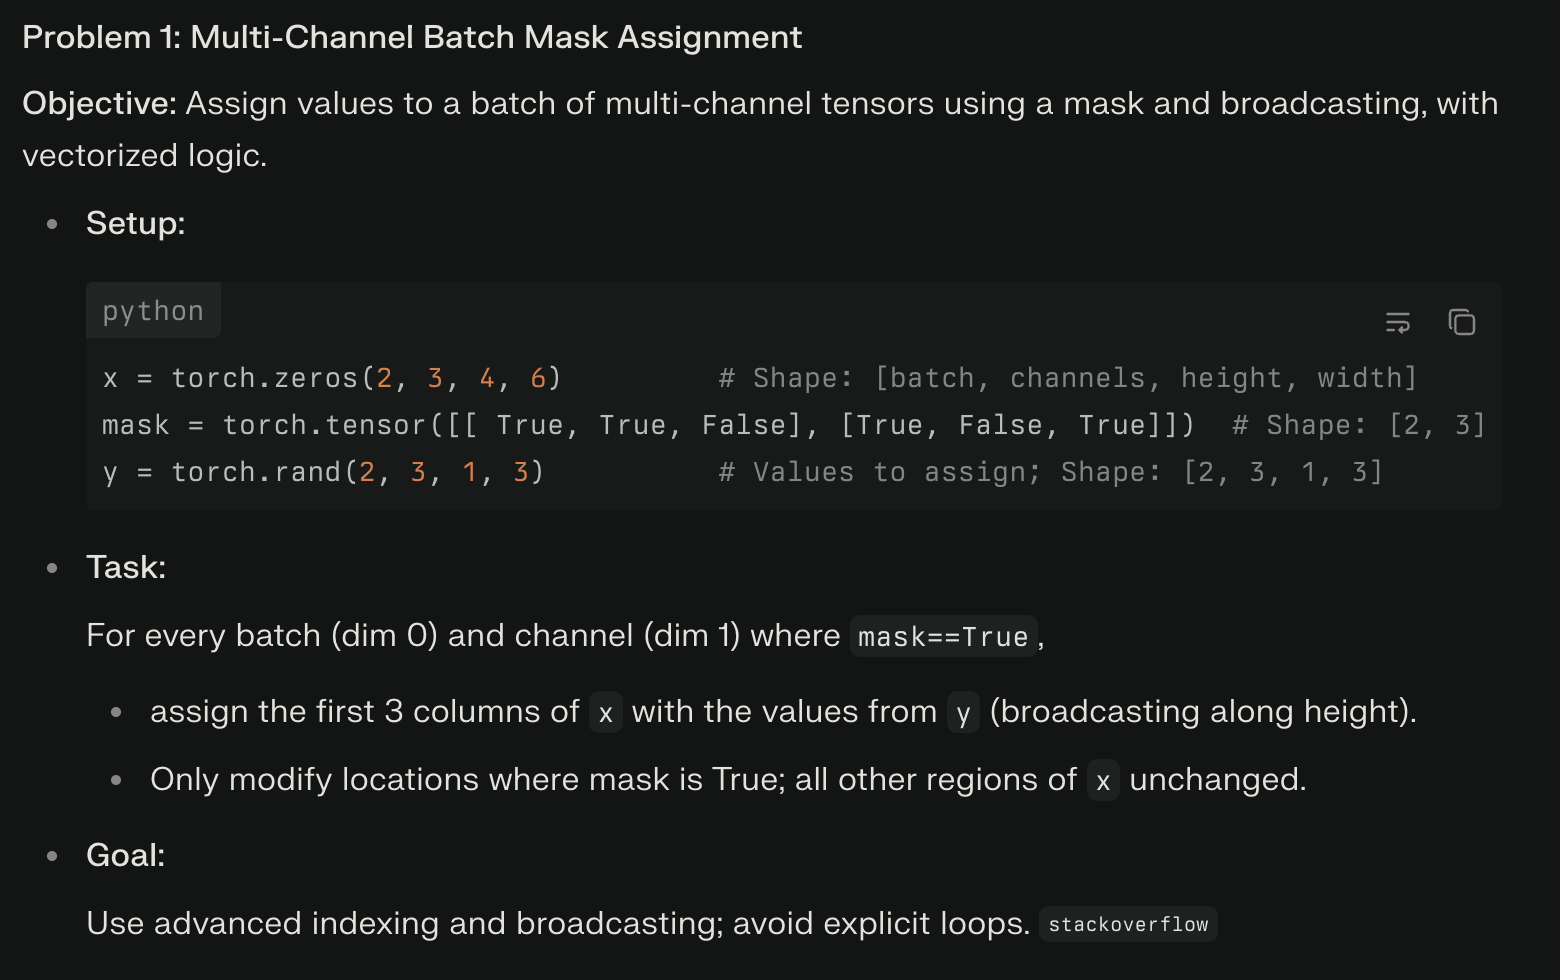

In [50]:
import torch
x = torch.zeros((2,3,4,6))
mask = torch.tensor([[True,True,False],[True, False, True]]) # 6 values where the mask is true
y = torch.rand(2,3,1,3)
mask_2 = torch.tensor([[[True,True,False],[True,False,False]],[[False,True,False],[True, True, True]],[[False,True,True],[True,False,False]]])

In [52]:
torch.where(mask_2)

(tensor([0, 0, 0, 1, 1, 1, 1, 2, 2, 2]),
 tensor([0, 0, 1, 0, 1, 1, 1, 0, 0, 1]),
 tensor([0, 1, 0, 1, 0, 1, 2, 1, 2, 0]))

In [48]:
batch_ids, channel_ids = torch.where(mask)
for b, c in zip(batch_ids, channel_ids):
    x[b,c,:,:3] = y[b,c,0,:]

In [49]:
x

tensor([[[[0.9601, 0.9026, 0.2044, 0.0000, 0.0000, 0.0000],
          [0.9601, 0.9026, 0.2044, 0.0000, 0.0000, 0.0000],
          [0.9601, 0.9026, 0.2044, 0.0000, 0.0000, 0.0000],
          [0.9601, 0.9026, 0.2044, 0.0000, 0.0000, 0.0000]],

         [[0.6916, 0.9868, 0.4838, 0.0000, 0.0000, 0.0000],
          [0.6916, 0.9868, 0.4838, 0.0000, 0.0000, 0.0000],
          [0.6916, 0.9868, 0.4838, 0.0000, 0.0000, 0.0000],
          [0.6916, 0.9868, 0.4838, 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]],


        [[[0.0038, 0.8648, 0.2651, 0.0000, 0.0000, 0.0000],
          [0.0038, 0.8648, 0.2651, 0.0000, 0.0000, 0.0000],
          [0.0038, 0.8648, 0.2651, 0.0000, 0.0000, 0.0000],
          [0.0038, 0.8648, 0.2651, 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0

In [42]:
torch.where(mask)

(tensor([0, 0, 1, 1]), tensor([0, 1, 0, 2]))

In [ ]:
x_true = x[mask] # will give 6 samples with [height, width] as the shape
print(x_true.shape)
y = y.squeeze(dim=2)
x_true[:,:,:3] = y[:,:,:]

RuntimeError: The expanded size of the tensor (4) must match the existing size (3) at non-singleton dimension 1.  Target sizes: [4, 4, 3].  Tensor sizes: [2, 3, 3]

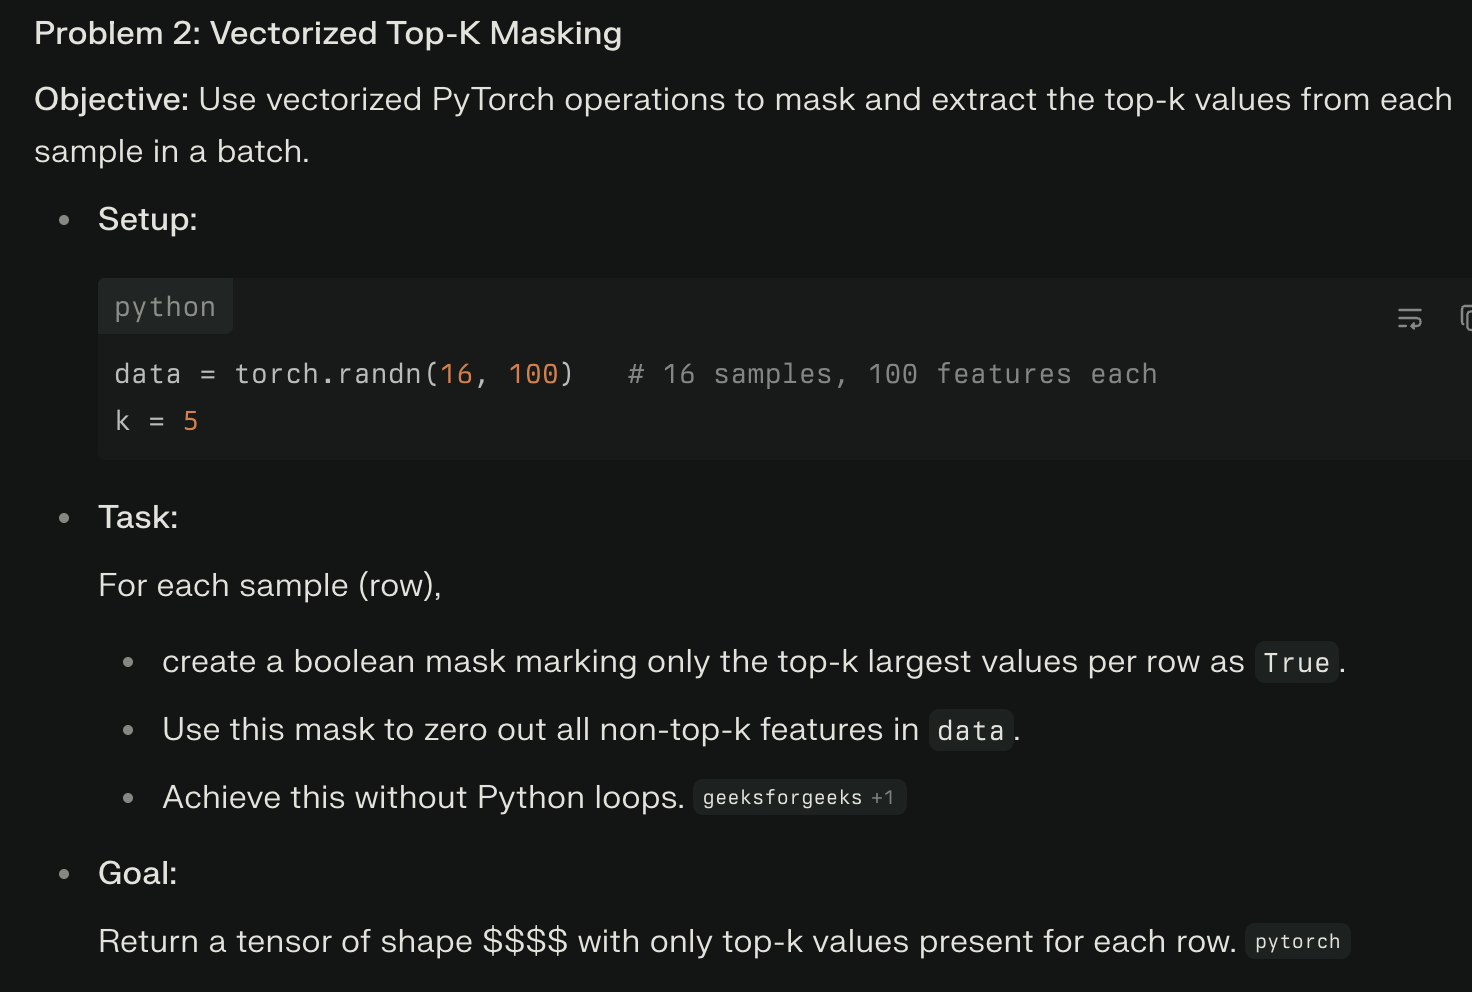

In [ ]:
import torch
A = torch.randn((16,100))
k = 5
